In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.enable_eager_execution()

In [182]:
n = 100
x = y = tf.linspace(-1.0, 1.0, n)
X, Y = tf.meshgrid(x, y)
x = tf.reshape(X, [-1])
y = tf.reshape(Y, [-1])
z = tf.stack([x, y],axis=1)

In [158]:
def l_p(x, p):
    return tf.reduce_sum(x**float(p), axis=1)**(1.0/float(p))

In [159]:
def calc(z, loss):
    with tf.GradientTape() as tape:
        tape.watch(z)
        l = loss(z)
    dldz = -tape.gradient(l, z)
    return l, dldz

In [160]:
def plotter(X, Y, l, dldz):
    plt.figure(figsize=(8,8))
    plt.contour(X.numpy(), Y.numpy(), np.reshape(l.numpy(), [n, n]), cmap=plt.cm.winter)
    plt.streamplot(X.numpy(), Y.numpy(), np.reshape(dldz.numpy()[:, 0], [n, n]), 
                   np.reshape(dldz.numpy()[:, 1], [n, n]), 
                   density=0.5, cmap=plt.cm.autumn,
                   color=np.reshape(l.numpy(), [n, n]))

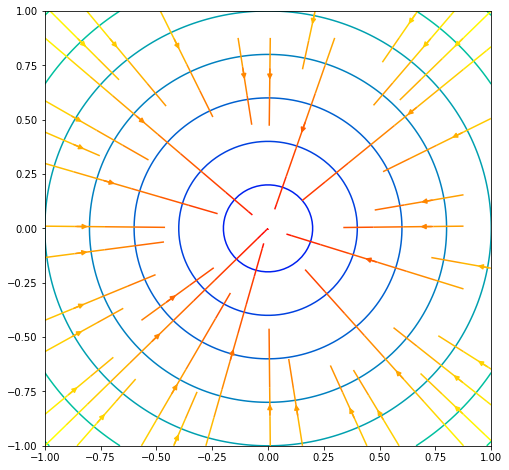

In [161]:
l, dldz = calc(z, lambda x: l_p(x, 2))
plotter(X, Y, l, dldz)

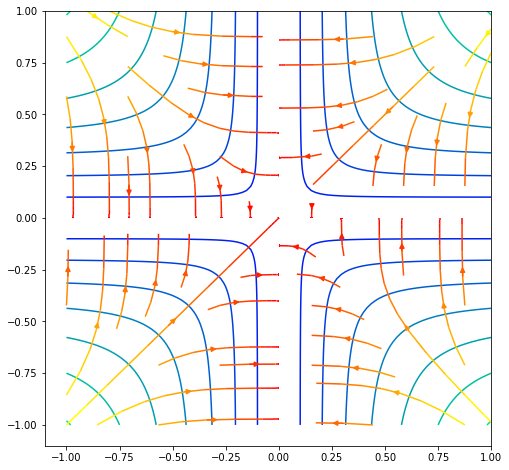

In [162]:
l, dldz = calc(z, lambda x: l_p(x, -2))
plotter(X, Y, l, dldz)

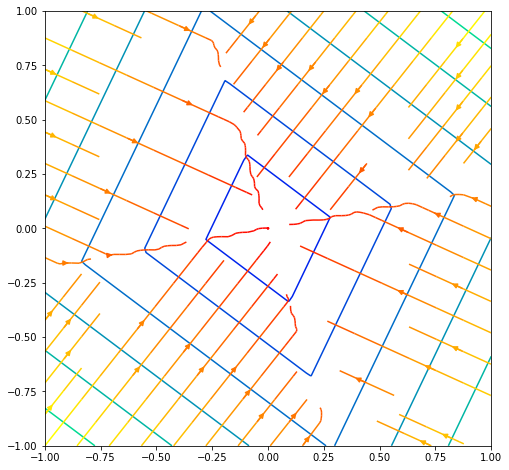

In [173]:
def ortho(x):
    # should be orthogonal to some vectors...
    d = tf.matmul(x, tf.random_normal([2, 2]), transpose_b=True)
    return tf.reduce_sum(tf.abs(d), axis=1)

l, dldz = calc(z, ortho)
plotter(X, Y, l, dldz)

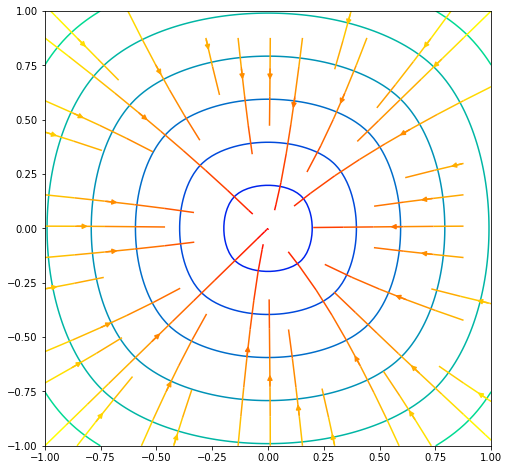

In [177]:
def cov(x):
    # should be orthogonal to some vectors...
    d = tf.matmul(x, x, transpose_b=True)
    return tf.reduce_sum(tf.abs(d), axis=1)

l, dldz = calc(z, cov)
plotter(X, Y, l, dldz)

In [190]:
from scipy.stats import norm, multivariate_normal

In [ ]:
def gaussian()

In [220]:
mean = np.zeros(10)
cov = np.diag(np.ones(10))

In [221]:
def entropy(p):
    return -p*np.log(p)

def TC(x):
    s =np.sum([entropy(norm.pdf(x_i)) for x_i in tf.unstack(x, axis=1)])
    return s - entropy(multivariate_normal.pdf(x, mean=mean, cov=cov))

In [222]:
TC(tf.random_normal([2, 10]))

array([6.80208101, 6.8020439 ])

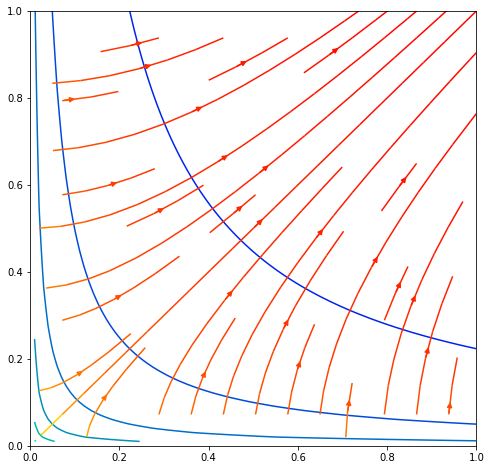

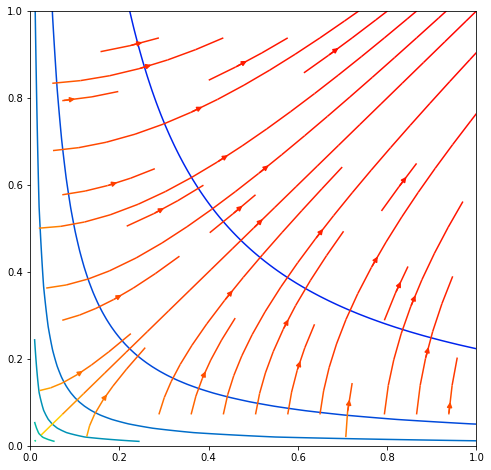

In [115]:
def CE(x, t):
    return tf.reduce_sum(-t*tf.log(x), axis=1)

n = 100
x = y = tf.linspace(0.0, 1.0, n)
X, Y = tf.meshgrid(x, y)
x = tf.reshape(X, [-1])
y = tf.reshape(Y, [-1])
z = tf.stack([x, y],axis=1)

l, dldz = calc(z, lambda x: CE(x, t=1.0))
plotter(X, Y, l, dldz)

l, dldz = calc(z, lambda x: CE(x, t=1e-8))
plotter(X, Y, l, dldz)